# NS Shop+편성데이터(NS홈쇼핑) 를 활용하여 방송편성표에 따른
# 판매실적을 예측하고, 최적 수익을 고려한 요일별/ 시간대별 / 카테고리별 편성
# 최적화 방안(모형) 제시

In [1]:
import pandas as pd

In [2]:
실적데이터 = pd.read_excel(
    r'./01_제공데이터/2020 빅콘테스트 데이터분석분야-챔피언리그_2019년 실적데이터.xlsx', header=1)
시청률데이터 = pd.read_excel(
    r'./01_제공데이터/2020 빅콘테스트 데이터분석분야-챔피언리그_시청률 데이터.xlsx', header=1)
평가데이터 = pd.read_excel(
    r'./02_평가데이터/2020 빅콘테스트 데이터분석분야-챔피언리그_2020년 6월 판매실적예측데이터(평가데이터).xlsx', header=1)

In [14]:
# 19년1월~19년12월 프로그램별 실적 데이터  
실적데이터

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 06:00:00,20.000000,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0
2,2019-01-01 06:20:00,20.000000,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0
4,2019-01-01 06:40:00,20.000000,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0
...,...,...,...,...,...,...,...,...
38304,2020-01-01 00:20:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38305,2020-01-01 00:40:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38306,2020-01-01 01:00:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38307,2020-01-01 01:20:00,20.000000,100490,201478,더케이 예다함 상조서비스(티포트),무형,0,NaN


In [18]:
# 요일별/시간대별 분단위 시청률 데이터 (단위 %)
시청률데이터

,시간대,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,...,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,년평균
0,02:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003
1,02:01,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.012,0.003
2,02:02,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004
3,02:03,0.000,0.000,0.014,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.017,0.000,0.000,0.000,0.000,0.000,0.000,0.004
4,02:04,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.017,0.000,0.000,0.000,0.000,0.000,0.000,0.004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,01:56,0.000,0.000,0.000,0.000,0.027,0.000,0.000,0.000,0.000,...,0.013,0.000,0.000,0.000,0.015,0.000,0.000,0.000,0.000,0.004
1437,01:57,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004,...,0.013,0.000,0.000,0.000,0.015,0.000,0.000,0.000,0.000,0.004
1438,01:58,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004,...,0.013,0.017,0.000,0.000,0.015,0.000,0.000,0.019,0.000,0.004
1439,01:59,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004,...,0.013,0.000,0.000,0.000,0.015,0.000,0.000,0.000,0.000,0.004


In [16]:
실적데이터.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38309 entries, 0 to 38308
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    38309 non-null  datetime64[ns]
 1   노출(분)   21525 non-null  float64       
 2   마더코드    38309 non-null  int64         
 3   상품코드    38309 non-null  int64         
 4   상품명     38309 non-null  object        
 5   상품군     38309 non-null  object        
 6   판매단가    38309 non-null  int64         
 7   취급액     37372 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.3+ MB


In [19]:
시청률데이터.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Columns: 367 entries, 시간대 to 2019-01-01 to 2019-12-31
dtypes: float64(366), object(1)
memory usage: 4.0+ MB


In [3]:
실적데이터.columns=['방송일시', '노출', '마더코드', '상품코드', '상품명', '상품군', '판매단가', '취급액']

In [4]:
# 결측값 처리 
# 1. 판매단가가 0인 데이터 제거
실적데이터.취급액.fillna(0, inplace=True)

In [5]:
# 2. 노출값이 nan인 항목은 바로 위 항목으로 채우기
실적데이터.노출.fillna(method='ffill', inplace=True)

In [28]:
실적데이터[실적데이터['상품군']=='무형'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 937 entries, 2318 to 38308
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    937 non-null    datetime64[ns]
 1   노출(분)   937 non-null    float64       
 2   마더코드    937 non-null    int64         
 3   상품코드    937 non-null    int64         
 4   상품명     937 non-null    object        
 5   상품군     937 non-null    object        
 6   판매단가    937 non-null    int64         
 7   취급액     0 non-null      float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 65.9+ KB


In [14]:
실적데이터.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38309 entries, 0 to 38308
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    38309 non-null  datetime64[ns]
 1   노출      38309 non-null  float64       
 2   마더코드    38309 non-null  int64         
 3   상품코드    38309 non-null  int64         
 4   상품명     38309 non-null  object        
 5   상품군     38309 non-null  object        
 6   판매단가    38309 non-null  int64         
 7   취급액     38309 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.3+ MB


In [6]:
실적데이터.drop(['마더코드', '상품코드','상품명'], axis=1, inplace=True)

In [7]:
실적데이터=실적데이터[실적데이터.방송일시<'2020-01-01']

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

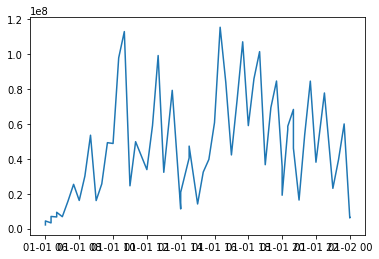

In [22]:
실적데이터_1 = 실적데이터[실적데이터.방송일시<='2019-01-02']
plt.plot(실적데이터_1.방송일시, 실적데이터_1.취급액)

In [25]:
실적데이터.상품군.unique()

array(['의류', '속옷', '주방', '농수축', '이미용', '가전', '생활용품', '건강기능', '잡화', '무형',
       '가구', '침구'], dtype=object)

In [9]:
# 주문량 = 취급액 / 판매단가 round(x[1]/x[0], 3) if x[0]!=0 else 0
실적데이터['주문량'] = (실적데이터.취급액/실적데이터.판매단가).fillna(0)

In [10]:
실적데이터['월']=실적데이터.방송일시.dt.month
실적데이터['일']=실적데이터.방송일시.dt.day
실적데이터['요일']=실적데이터.방송일시.dt.weekday
실적데이터['시간']=실적데이터.방송일시.dt.time

In [11]:
실적데이터.시간

0        06:00:00
1        06:00:00
2        06:20:00
3        06:20:00
4        06:40:00
           ...   
38295    23:20:00
38296    23:40:00
38297    23:40:00
38298    23:40:00
38299    23:40:00
Name: 시간, Length: 38300, dtype: object

In [12]:
실적데이터['시간'] = 실적데이터.시간.apply(lambda x : str(x)).apply(lambda x : int(x.split(':')[0])*60 + int(x.split(':')[1]))

In [124]:
실적데이터['방송날짜'] = 실적데이터.방송일시.apply(lambda x : str(x)).apply(lambda x : x.split(' ')[0])

In [103]:
실적데이터['방송시간'] = 실적데이터.방송일시.apply(lambda x : str(x)).apply(lambda x : x.split(' ')[1][:-3])

In [138]:
import datetime

In [104]:
실적데이터

,방송일시,노출,상품군,판매단가,취급액,주문량,월,일,요일,시간,방송날짜,방송시간,방송시간차이
0,2019-01-01 06:00:00,20.0,의류,39900,2099000.0,52.606516,1,1,1,360,2019-01-01,06:00,20
1,2019-01-01 06:00:00,20.0,의류,39900,4371000.0,109.548872,1,1,1,360,2019-01-01,06:00,20
2,2019-01-01 06:20:00,20.0,의류,39900,3262000.0,81.754386,1,1,1,380,2019-01-01,06:20,20
3,2019-01-01 06:20:00,20.0,의류,39900,6955000.0,174.310777,1,1,1,380,2019-01-01,06:20,20
4,2019-01-01 06:40:00,20.0,의류,39900,6672000.0,167.218045,1,1,1,400,2019-01-01,06:40,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38295,2019-12-31 23:20:00,20.0,주방,148000,1664000.0,11.243243,12,31,1,1400,2019-12-31,23:20,20
38296,2019-12-31 23:40:00,20.0,주방,178000,9149000.0,51.398876,12,31,1,1420,2019-12-31,23:40,20
38297,2019-12-31 23:40:00,20.0,주방,168000,15282000.0,90.964286,12,31,1,1420,2019-12-31,23:40,20
38298,2019-12-31 23:40:00,20.0,주방,158000,2328000.0,14.734177,12,31,1,1420,2019-12-31,23:40,20


In [19]:
시청률데이터.set_index('시간대', inplace=True)
시청률데이터.rename(columns={'2019-01-01 to 2019-12-31' : '년평균'}, inplace=True)
시청률데이터.rename(index={'월화수목금토일02:00-01:59' : '일평균'}, inplace=True)

In [20]:
시청률데이터.index

Index(['02:00', '02:01', '02:02', '02:03', '02:04', '02:05', '02:06', '02:07',
       '02:08', '02:09',
       ...
       '01:51', '01:52', '01:53', '01:54', '01:55', '01:56', '01:57', '01:58',
       '01:59', '일평균'],
      dtype='object', name='시간대', length=1441)

In [21]:
시청률데이터1 = 시청률데이터.loc[:"01:59",:"2019-12-31"]

In [130]:
시청률데이터1

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
시간대,,,,,,,,,,,,,,,,,,,,,
02:00,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.000,...,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000
02:01,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.005,...,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.012
02:02,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.005,...,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000
02:03,0.0,0.0,0.014,0.0,0.000,0.0,0.0,0.0,0.000,0.005,...,0.0,0.000,0.000,0.017,0.0,0.000,0.0,0.0,0.000,0.000
02:04,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.005,...,0.0,0.000,0.000,0.017,0.0,0.000,0.0,0.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01:55,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.004,0.000,...,0.0,0.013,0.000,0.000,0.0,0.015,0.0,0.0,0.000,0.000
01:56,0.0,0.0,0.000,0.0,0.027,0.0,0.0,0.0,0.000,0.000,...,0.0,0.013,0.000,0.000,0.0,0.015,0.0,0.0,0.000,0.000
01:57,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.004,0.000,...,0.0,0.013,0.000,0.000,0.0,0.015,0.0,0.0,0.000,0.000


In [135]:
분당평균시청률=[]
for i in range(len(실적데이터)):
    시작=실적데이터.방송시간.iloc[i]
    종료=str(pd.to_datetime(실적데이터.방송시간.iloc[i])+datetime.timedelta(minutes=round(float(실적데이터.노출.iloc[i]),0)-1)).split(" ")[1][:-3]
    분당평균시청률.append((시청률데이터1[실적데이터.방송날짜.iloc[i]].loc[시작:종료].mean()))
    
분당평균시청률

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0017500000000000003,
 0.0,
 0.0005499999999999999,
 0.00015000000000000001,
 0.0005499999999999999,
 0.004149999999999999,
 0.006150000000000001,
 0.0,
 0.0,
 0.0075,
 0.010000000000000002,
 0.010000000000000002,
 0.010000000000000004,
 0.010000000000000004,
 0.005900000000000001,
 0.005900000000000001,
 0.0033666666666666667,
 0.0033666666666666667,
 0.008400000000000001,
 0.012900000000000003,
 0.012,
 0.007600000000000001,
 0.0005,
 0.0030499999999999998,
 0.0007,
 0.0008500000000000001,
 0.0,
 0.0,
 0.013500000000000002,
 0.020149999999999998,
 0.0021,
 0.0021000000000000003,
 0.0,
 0.0,
 0.0,
 0.00035,
 0.00035,
 0.001,
 0.001,
 0.0,
 0.0007,
 0.0066,
 0.0008,
 0.005933333333333333,
 0.00095,
 0.0006000000000000001,
 0.0,
 0.005900000000000001,
 0.005900000000000001,
 0.007050000000000001,
 0.007050000000000001,
 0.0007,
 0.0007,
 0.00195,
 0.0,
 0.0,
 0.0006000000000000001,
 0.00015000000000000001,
 0.0010999999

In [136]:
실적데이터['분당평균시청률']=분당평균시청률

In [137]:
실적데이터

,방송일시,노출,상품군,판매단가,취급액,주문량,월,일,요일,시간,방송날짜,방송시간,분당평균시청률
0,2019-01-01 06:00:00,20.0,의류,39900,2099000.0,52.606516,1,1,1,360,2019-01-01,06:00,0.0000
1,2019-01-01 06:00:00,20.0,의류,39900,4371000.0,109.548872,1,1,1,360,2019-01-01,06:00,0.0000
2,2019-01-01 06:20:00,20.0,의류,39900,3262000.0,81.754386,1,1,1,380,2019-01-01,06:20,0.0000
3,2019-01-01 06:20:00,20.0,의류,39900,6955000.0,174.310777,1,1,1,380,2019-01-01,06:20,0.0000
4,2019-01-01 06:40:00,20.0,의류,39900,6672000.0,167.218045,1,1,1,400,2019-01-01,06:40,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38295,2019-12-31 23:20:00,20.0,주방,148000,1664000.0,11.243243,12,31,1,1400,2019-12-31,23:20,0.0000
38296,2019-12-31 23:40:00,20.0,주방,178000,9149000.0,51.398876,12,31,1,1420,2019-12-31,23:40,0.0206
38297,2019-12-31 23:40:00,20.0,주방,168000,15282000.0,90.964286,12,31,1,1420,2019-12-31,23:40,0.0206
38298,2019-12-31 23:40:00,20.0,주방,158000,2328000.0,14.734177,12,31,1,1420,2019-12-31,23:40,0.0206


In [140]:
평가데이터

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2020-06-01 06:20:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
1,2020-06-01 06:40:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
2,2020-06-01 07:00:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
3,2020-06-01 07:20:00,20.000000,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN
4,2020-06-01 07:40:00,20.000000,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN
...,...,...,...,...,...,...,...,...
2886,2020-07-01 00:20:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,NaN
2887,2020-07-01 00:40:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,NaN
2888,2020-07-01 01:00:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,NaN
2889,2020-07-01 01:20:00,20.000000,100261,200875,아놀드파마 티셔츠레깅스세트,의류,69900,NaN


In [55]:
평가데이터.상품군.unique()

array(['의류', '속옷', '이미용', '주방', '농수축', '무형', '가전', '생활용품', '가구', '잡화',
       '건강기능', '침구'], dtype=object)